Bank Marketing campaigns:

Data Set Information
The data is related with direct marketing campaigns of a European banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. Information about a predictive model currently being used by the bank is also included. The dataset contains 41188 records with 20 inputs, ordered by date (from May 2008 to November 2010).

Attribute Information:
Input variables: 
1 - age (numeric) 
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown') 
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed) 4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown') 
6 - housing: has housing loan? (categorical: 'no','yes','unknown') 
7 - loan: has personal loan? (categorical: 'no','yes','unknown') # related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone') 
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec') 
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri') 
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included
for benchmark purposes and should be discarded if the intention is to have a realistic predictive model. 

#other attributes: 
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact) 
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted) 
14 - previous: number of contacts performed before this campaign and for this client (numeric) 
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')


#social and economic context attributes 
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric) 
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric) 
19 - euribor3m: euribor 3 month rate - daily indicator (numeric) 
20 - nr.employed: number of employees - quarterly indicator (numeric)
21- ModelPerformance – Results from a current model used to predict whether a client will subscribe (‘yes’) to a term deposit (probability of subscribing to term deposit) 

Output Variable (desired target): 
22 - y - has the client subscribed a term deposit? (binary: 'yes','no')

In [1]:
# Import the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Study the Data set

In [2]:
#create data frame to read data set
df = pd.read_csv('DSADataSet.csv')

In [12]:
#Top 5 rows
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [13]:
#Shows information about data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [28]:
# describe statistics of numerical columns
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,ModelPrediction
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.887597
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.125351
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.250174
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.857484
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.945879
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.959214
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,0.988360


Basic Data Set Information


In [20]:
#find number of rows and column
df.shape

(41188, 22)

In [8]:
#find null values for all the inputs(column)
df.isnull().sum()

age                0
job                0
marital            0
education          0
default            0
housing            0
loan               0
contact            0
month              0
day_of_week        0
duration           0
campaign           0
pdays              0
previous           0
poutcome           0
emp.var.rate       0
cons.price.idx     0
cons.conf.idx      0
euribor3m          0
nr.employed        0
ModelPrediction    0
y                  0
dtype: int64

Exploratory Data Analysis
1. Explore categorical features (EDA)

In [46]:
#Get the insights about categorical data with number of count
print(df["job"].value_counts())
print("="*30)
print(df["marital"].value_counts())
print("="*30)
print(df["education"].value_counts())
print("="*30)
print(df["default"].value_counts())
print("="*30)
print(df["housing"].value_counts())
print("="*30)
print(df["loan"].value_counts())
print("="*30)
print(df["contact"].value_counts())
print("="*30)
print(df["month"].value_counts())
print("="*30)
print(df["day_of_week"].value_counts())
print("="*30)
print(df["poutcome"].value_counts())
print("="*30)
print(df["y"].value_counts())

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64
married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64
no         32588
unknown     8597
yes            3
Name: default, dtype: int64
yes        21576
no         18622
unknown      990
Name: housing, dtype: int64
no         33950
yes         6248
unknown      990
Name: loan, dtype: int64
cellular     26144
telephone    15044
Name: contact, dtype: int64
may    13769
jul     7174
aug     6178

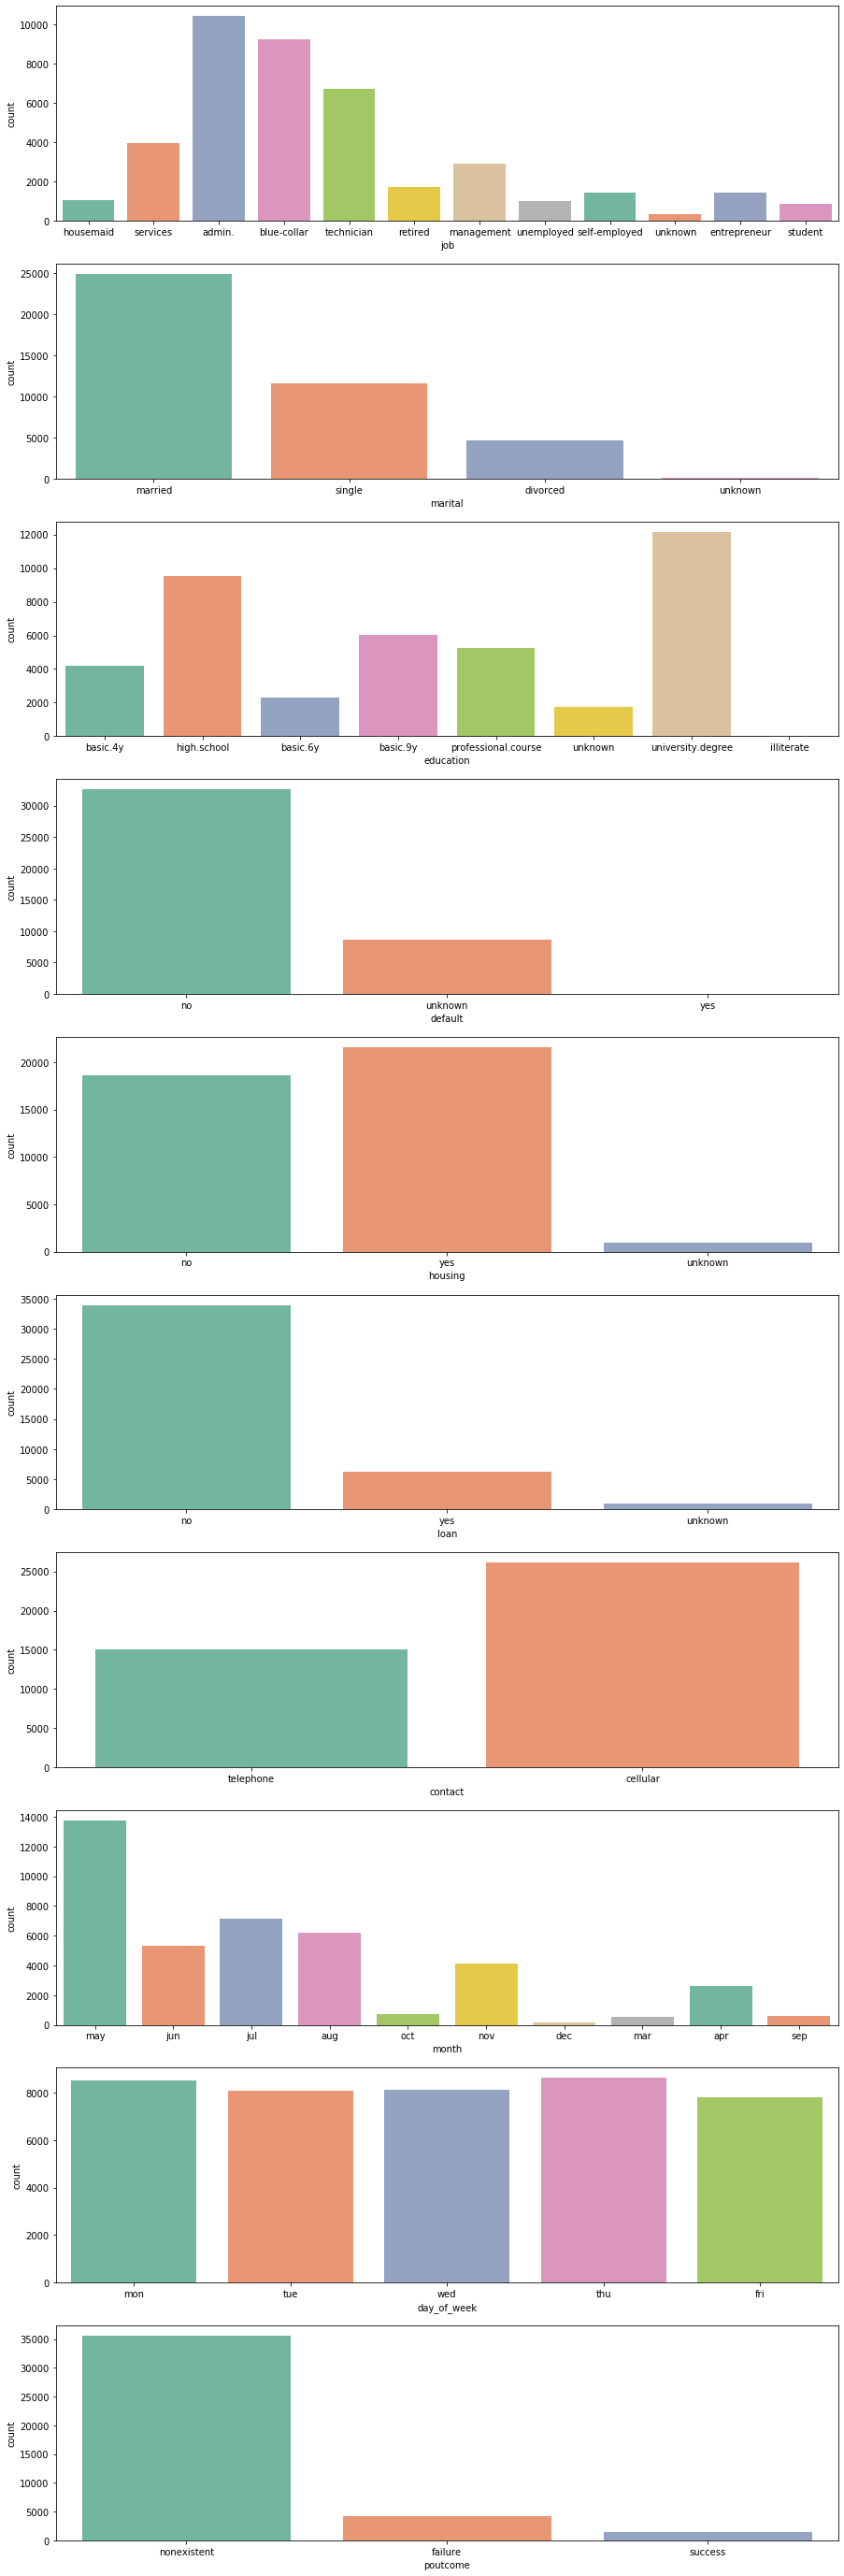

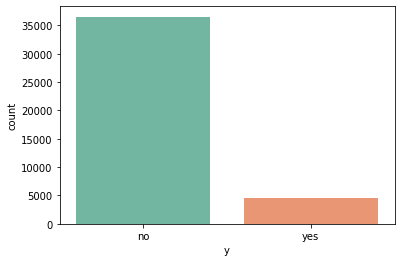

In [21]:
#Visualization of categorical inputs
categorical_data=[feature for feature in df.columns if ((df[feature].dtypes=='O') & (feature not in ['y']))]
categorical_data
plt.figure(figsize=(15,60), facecolor='white')
plotnumber =1
for categorical_data in categorical_data:
    ax = plt.subplot(12,1,plotnumber)
    sns.countplot(x=categorical_data,data=df,  palette="Set2")
    plotnumber+=1
plt.show()
sns.countplot(x='y',data=df,  palette="Set2")
plt.show()



In [18]:
#Check target label split over categorical features and find the count
for categorical_data in categorical_data:
    print(df.groupby(['y',categorical_data]).size())

y    job          
no   admin.           9070
     blue-collar      8616
     entrepreneur     1332
     housemaid         954
     management       2596
     retired          1286
     self-employed    1272
     services         3646
     student           600
     technician       6013
     unemployed        870
     unknown           293
yes  admin.           1352
     blue-collar       638
     entrepreneur      124
     housemaid         106
     management        328
     retired           434
     self-employed     149
     services          323
     student           275
     technician        730
     unemployed        144
     unknown            37
dtype: int64
y    marital 
no   divorced     4136
     married     22396
     single       9948
     unknown        68
yes  divorced      476
     married      2532
     single       1620
     unknown        12
dtype: int64
y    education          
no   basic.4y                3748
     basic.6y                2104
     basic.9y   

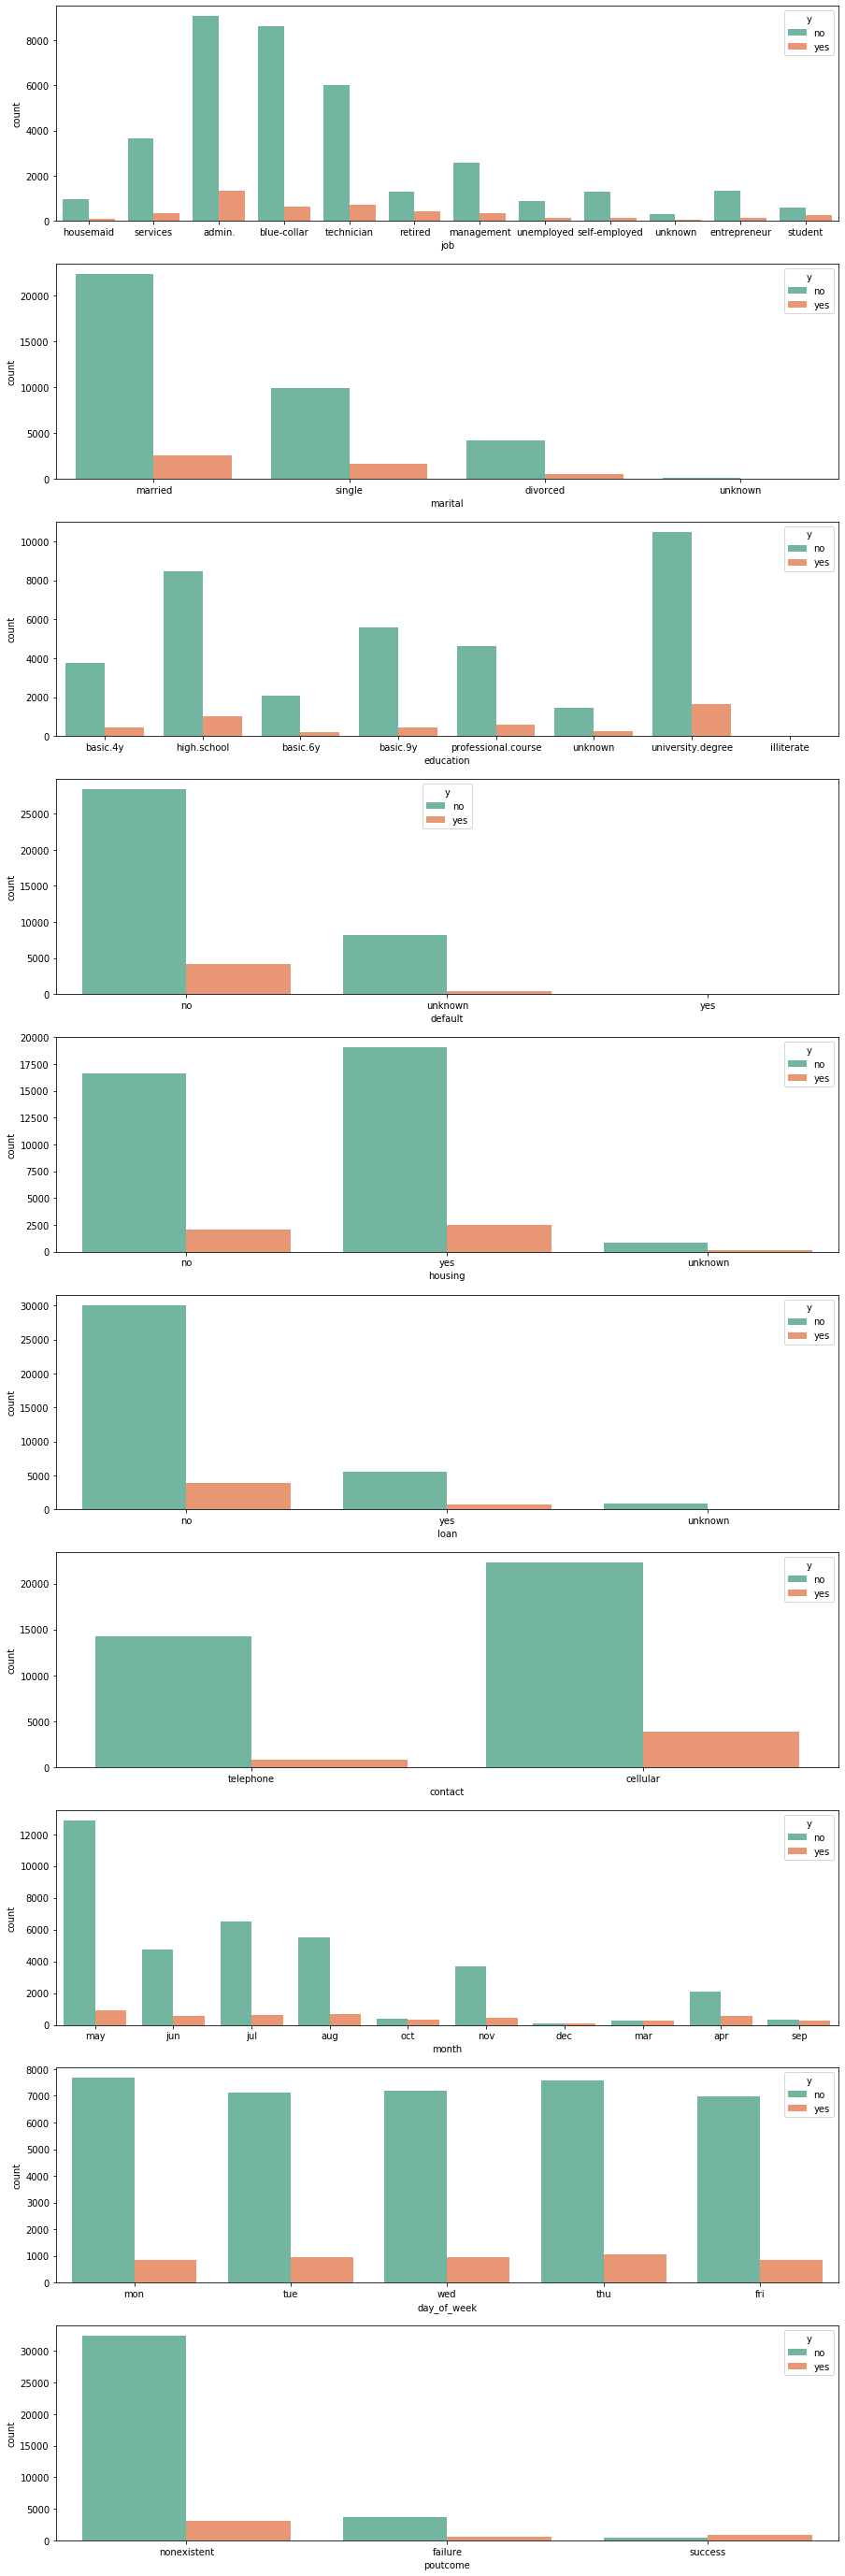

In [11]:
#Exploratory Data Analysis for categorical variable with target lable term deposit

categorical_data=[feature for feature in df.columns if ((df[feature].dtypes=='O') & (feature not in ['y']))]
categorical_data
plt.figure(figsize=(15,60))
plotnumber =1
for categorical_data in categorical_data:
    ax = plt.subplot(12,1,plotnumber)
    sns.countplot(x=categorical_data, hue='y', data=df,  palette="Set2")
    plotnumber+=1
plt.show()


In [4]:
# list of numerical variables
continuous_data = [feature for feature in df.columns if ((df[feature].dtypes != 'O') & (feature not in ['y']))]
print('Number of numerical variables: ', len(continuous_data))

# visualise the numerical variables
df[continuous_data].head()

Number of numerical variables:  10


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0


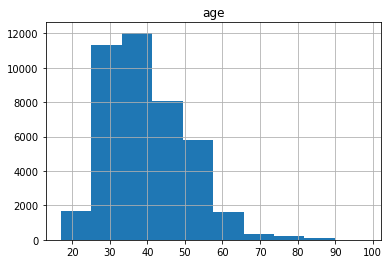

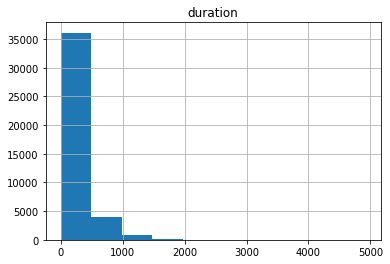

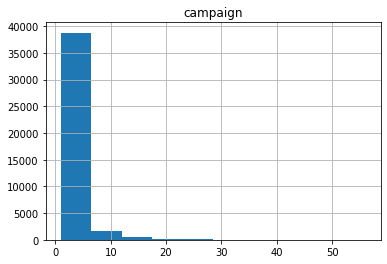

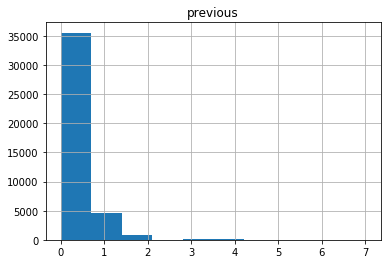

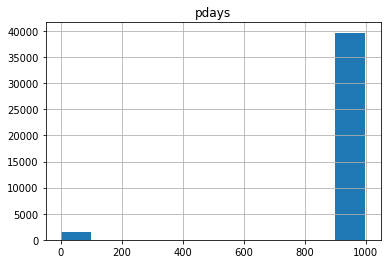

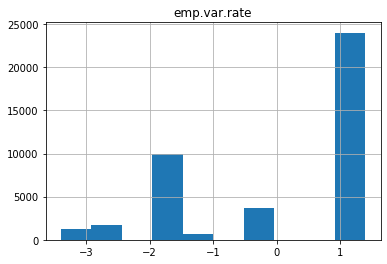

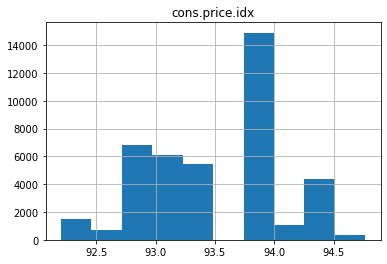

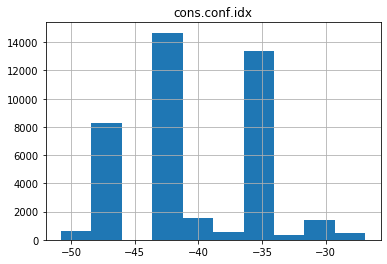

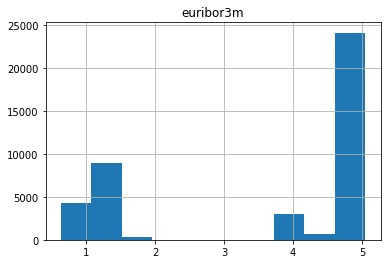

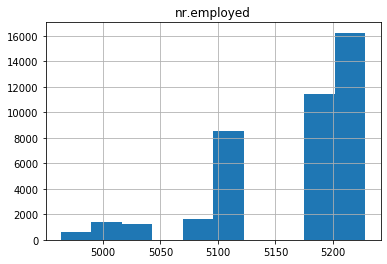

In [29]:
#plot a distribution of continues observations plt
df.hist(column='age')
df.hist(column='duration')
df.hist(column='campaign')
df.hist(column='previous')
df.hist(column='pdays')
df.hist(column='emp.var.rate')
df.hist(column='cons.price.idx')
df.hist(column='cons.conf.idx')
df.hist(column='euribor3m')
df.hist(column='nr.employed')
plt.show()


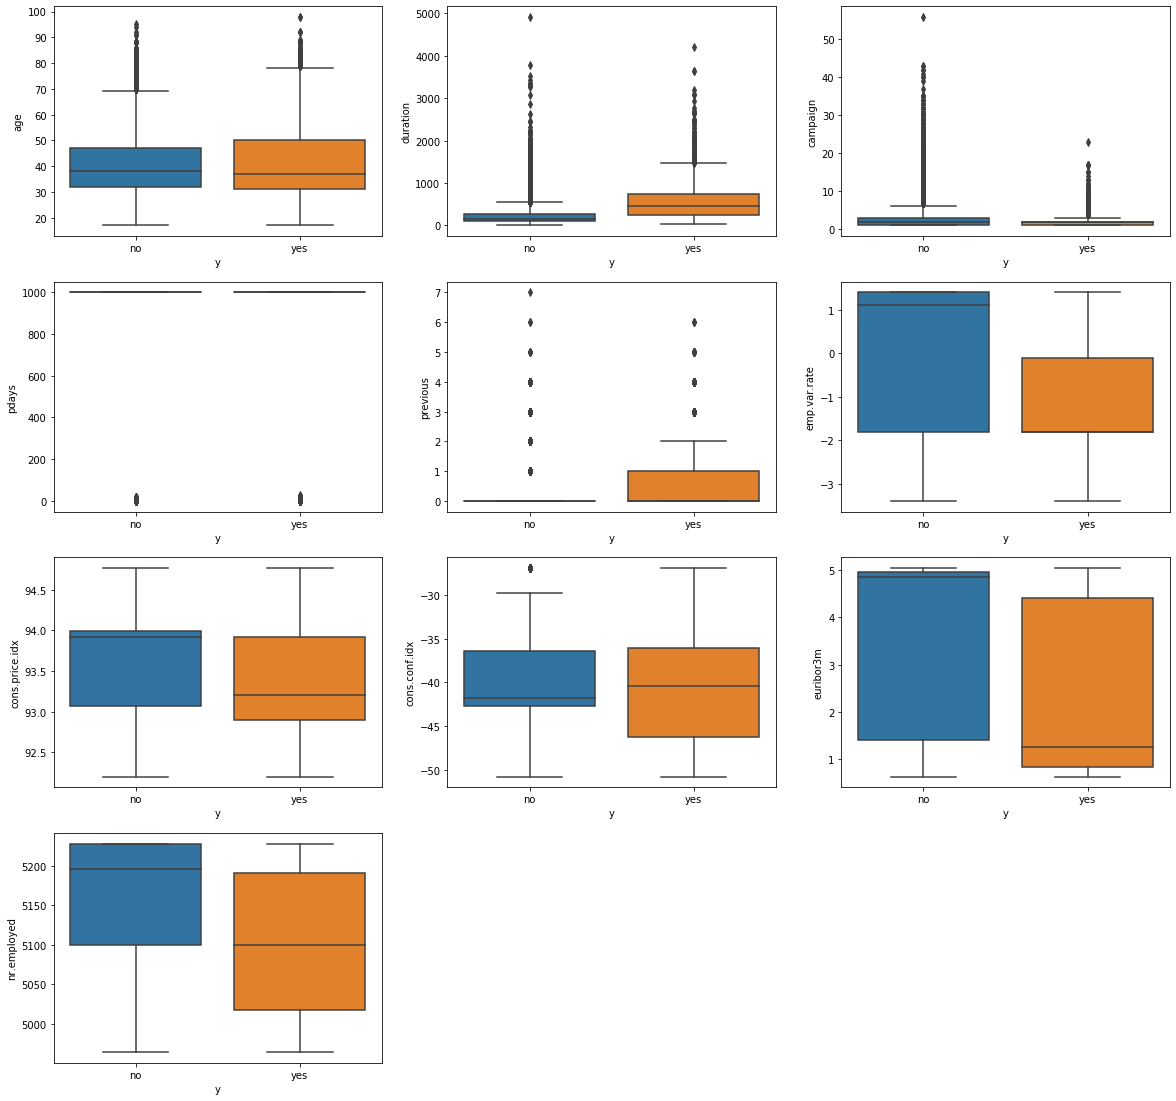

In [5]:
#boxplot to show target distribution with respect numerical features
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for feature in continuous_data:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(x="y", y= df[feature], data=df)
    plotnumber+=1
plt.show()


In [6]:
# Build correlation matrix
corr = df.corr()
corr.style.background_gradient(cmap='PuBu')

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333
emp.var.rate,-0.000371,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970
cons.price.idx,0.000857,0.005312,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034
cons.conf.idx,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513
euribor3m,0.010767,-0.032897,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154
nr.employed,-0.017725,-0.044703,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000
